In [3]:
from sklearn.datasets import make_blobs

# Create dataset with 4 random cluster centers and 4000 datapoints
x, y = make_blobs(n_samples = 1000, centers = 4, n_features=2, shuffle=True, random_state=31)

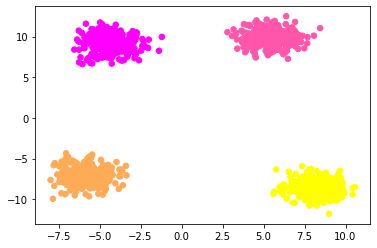

In [4]:
import matplotlib.pyplot as plt
# plotting scatters 
plt.scatter(x[:, 0], x[:, 1], c=y, s=30, cmap='spring');
plt.show() 

## The above generated dataset has 4 clusters. We will use Both Elbow Method and Silhouette method on our data set

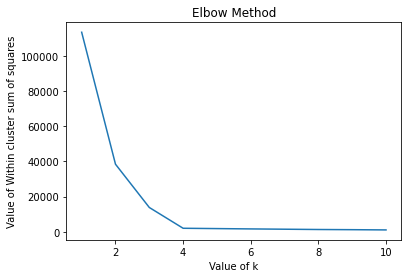

In [5]:
#### applying elbow method like before to find out k
from sklearn.cluster import KMeans
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.xlabel("Value of k")
plt.ylabel("Value of Within cluster sum of squares")
plt.title("Elbow Method")
plt.show()

## The Silhouette Method

 sklearn.metrics.silhouette_score(X, labels, metric='euclidean')
 X = input array or dataset
 labels = predicted values of the input dataset

In [6]:
from sklearn.metrics import silhouette_score

sil = []
kmax = 10

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, kmax+1):
    kmeans = KMeans(n_clusters = k).fit(x)
    labels = kmeans.labels_
    sil.append(silhouette_score(x, labels, metric = 'euclidean'))

In [7]:
print(sil)

[0.6417483986377633, 0.7700420426351827, 0.844807743233951, 0.7209951909145734, 0.6021000681137575, 0.46872019117143204, 0.3296945151462824, 0.33732884140486497, 0.34539194428731096]


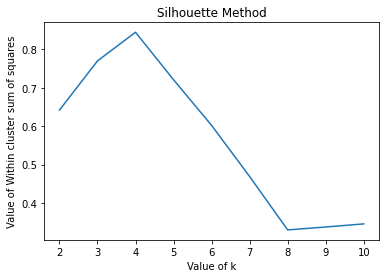

In [8]:
plt.plot(range(2,11),sil)
plt.xlabel("Value of k")
plt.ylabel("Value of Within cluster sum of squares")
plt.title("Silhouette Method")
plt.show()

In [9]:
####Applying k means with selected value of k and training the K-means model on a dataset  

kmeans = KMeans(n_clusters=4, init='k-means++', random_state= 42)  
y_predict= kmeans.fit_predict(x)  

In [10]:
print(y_predict)

[1 0 3 2 2 3 3 3 1 0 1 2 3 2 0 2 3 1 1 3 0 0 0 2 2 2 1 3 0 1 1 1 3 2 1 1 0
 1 2 0 1 1 2 1 3 0 1 0 1 0 2 0 1 3 1 3 1 1 2 1 2 1 3 1 3 3 0 0 1 3 1 2 1 2
 3 3 0 0 2 3 2 2 0 1 1 0 2 1 2 2 3 2 3 0 2 1 2 1 3 1 2 1 0 1 1 3 0 3 3 3 1
 2 3 0 1 1 2 0 2 3 3 0 2 3 0 3 0 1 0 2 0 2 3 1 0 0 0 3 3 2 3 2 3 0 1 3 3 2
 1 2 1 3 2 0 0 0 3 1 2 3 0 2 3 2 1 3 2 3 1 2 1 1 1 3 1 0 2 1 2 2 0 0 3 2 2
 2 1 0 0 2 0 2 3 1 1 0 2 2 0 0 1 3 0 1 1 1 3 0 3 1 3 0 3 3 3 1 2 0 2 3 2 0
 0 0 1 3 0 2 0 3 0 3 3 1 1 0 1 3 0 2 2 0 0 2 3 2 3 0 3 2 0 2 2 1 1 1 3 2 3
 2 2 0 0 3 2 0 1 2 3 3 3 0 3 0 0 1 2 0 1 3 0 3 2 3 1 1 1 3 2 2 0 1 0 1 1 0
 0 2 3 3 1 3 2 2 0 1 2 3 1 0 0 0 1 0 3 1 1 1 3 2 2 1 0 2 0 0 0 2 2 1 3 0 1
 1 1 0 1 2 0 2 2 0 3 1 0 2 2 3 2 0 3 1 2 1 3 2 3 0 1 3 1 1 0 3 0 3 2 1 0 0
 0 0 2 0 0 1 0 1 1 3 1 1 0 2 3 3 1 0 0 1 3 2 2 0 3 0 1 2 1 2 3 2 0 3 1 2 0
 1 2 0 1 2 1 2 1 3 1 3 3 1 1 0 3 2 1 0 1 3 2 2 0 3 0 2 3 3 0 0 2 3 1 0 1 0
 2 2 1 0 2 3 3 3 3 3 2 1 2 0 1 3 2 2 1 3 3 3 3 1 0 1 1 2 2 0 2 3 0 1 0 3 3
 2 3 3 1 0 0 0 3 2 3 3 0 

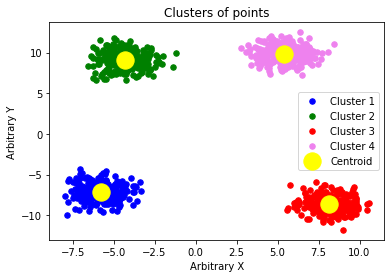

In [11]:
###Visualizing the clusters

#Converting dataframe into array for boolean subsetting purpose for plotting
plt.scatter(x[y_predict == 0, 0], x[y_predict == 0, 1], s = 30, c = 'blue', label = 'Cluster 1') #for first cluster  
plt.scatter(x[y_predict == 1, 0], x[y_predict == 1, 1], s = 30, c = 'green', label = 'Cluster 2') #for second cluster  
plt.scatter(x[y_predict== 2, 0], x[y_predict == 2, 1], s = 30, c = 'red', label = 'Cluster 3') #for third cluster  
plt.scatter(x[y_predict== 3, 0], x[y_predict == 3, 1], s = 30, c = 'violet', label = 'Cluster 4') #for third cluster  
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroid')   
plt.title('Clusters of points')  
plt.xlabel('Arbitrary X')  
plt.ylabel('Arbitrary Y')  
plt.legend()  
plt.show()  